In [2]:
#import user modules
#--- MATPLOTLIB
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.markers import MarkerStyle
from matplotlib.gridspec import GridSpec
import matplotlib.colors as mcolors
import seaborn as sns
import pandas as pd

import sys
my_path = "../../Python/"
if my_path not in sys.path:
    sys.path.append(my_path)
 
for place in sys.path: 
    print(place)

from tools import *
from fit_funcs import *
from entropy import *
import costfun.costfun as cost
import utils.figures as fig_help
from RandomMatrixTheory import goe
import utils.tools as tools

import importlib as imp
def reload_modules():
    imp.reload(cost)
    imp.reload(fig_help)

import itertools
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
latex_engine = 'xelatex'
latex_elements = {'preamble':r'\usepackage{physics}'}

%matplotlib inline
colors_ls = (list(mcolors.TABLEAU_COLORS)[:200])
colors_ls_cyc = itertools.cycle(colors_ls)

markers_ls = ['o','s','v', 'D', '<', 'X', '^', '*', '+']
markers = itertools.cycle(markers_ls)

linestyle_ls = ['-','--',':', '-.']
linestyle = itertools.cycle(linestyle_ls)

#--- NUMERICAL LIBS
import numpy as np
import itertools
import math
import random
from cmath import nan
import h5py   


# SCIPY LIBS
import scipy.stats as statistics
from scipy.special import binom
from scipy.special import erfinv
from scipy.special import digamma
from scipy.special import polygamma
from scipy.special import lambertw
from scipy.optimize import curve_fit as fit
from scipy.signal import savgol_filter
from scipy import integrate
from scipy import fft
 
# OTHER
import warnings
warnings.filterwarnings('ignore')
from joblib import Parallel, delayed
import copy
import os
from os import sep as kPSep
from os.path import exists


config_disorder = 0
scaled_disorder = 1

if config_disorder:
    base_dir = "../results_conf_dis/"
else:
    base_dir = "../results/"

print(base_dir[2:])

/Users/rafal.swietek/Projects/CODES/QHamSolver/QuantumSun/Jupyter_Python
/Users/rafal.swietek/opt/anaconda3/lib/python39.zip
/Users/rafal.swietek/opt/anaconda3/lib/python3.9
/Users/rafal.swietek/opt/anaconda3/lib/python3.9/lib-dynload

/Users/rafal.swietek/opt/anaconda3/lib/python3.9/site-packages
/Users/rafal.swietek/opt/anaconda3/lib/python3.9/site-packages/aeosa
/Users/rafal.swietek/opt/anaconda3/lib/python3.9/site-packages/locket-0.2.1-py3.9.egg
/Users/rafal.swietek/opt/anaconda3/lib/python3.9/site-packages/IPython/extensions
/Users/rafal.swietek/.ipython
../../Python/
/results/


[0.75 0.8  0.85 0.9  0.95]
../results/Entropy/Eigenstate/_L=5,N=5,J=1,g=1,alfa=1,h=0,W'=0.75_beta.hdf5
../results/Entropy/Eigenstate/_L=5,N=5,J=1,g=1,alfa=1,h=0,W'=0.8_beta.hdf5
../results/Entropy/Eigenstate/_L=5,N=5,J=1,g=1,alfa=1,h=0,W'=0.85_beta.hdf5
../results/Entropy/Eigenstate/_L=5,N=5,J=1,g=1,alfa=1,h=0,W'=0.9_beta.hdf5
../results/Entropy/Eigenstate/_L=5,N=5,J=1,g=1,alfa=1,h=0,W'=0.95_beta.hdf5
../results/Entropy/Eigenstate/_L=6,N=5,J=1,g=1,alfa=1,h=0,W'=0.75_beta.hdf5
../results/Entropy/Eigenstate/_L=6,N=5,J=1,g=1,alfa=1,h=0,W'=0.8_beta.hdf5
../results/Entropy/Eigenstate/_L=6,N=5,J=1,g=1,alfa=1,h=0,W'=0.85_beta.hdf5
../results/Entropy/Eigenstate/_L=6,N=5,J=1,g=1,alfa=1,h=0,W'=0.9_beta.hdf5
../results/Entropy/Eigenstate/_L=6,N=5,J=1,g=1,alfa=1,h=0,W'=0.95_beta.hdf5
../results/Entropy/Eigenstate/_L=7,N=5,J=1,g=1,alfa=1,h=0,W'=0.75_beta.hdf5
../results/Entropy/Eigenstate/_L=7,N=5,J=1,g=1,alfa=1,h=0,W'=0.8_beta.hdf5
../results/Entropy/Eigenstate/_L=7,N=5,J=1,g=1,alfa=1,h=0,W'=0.85_

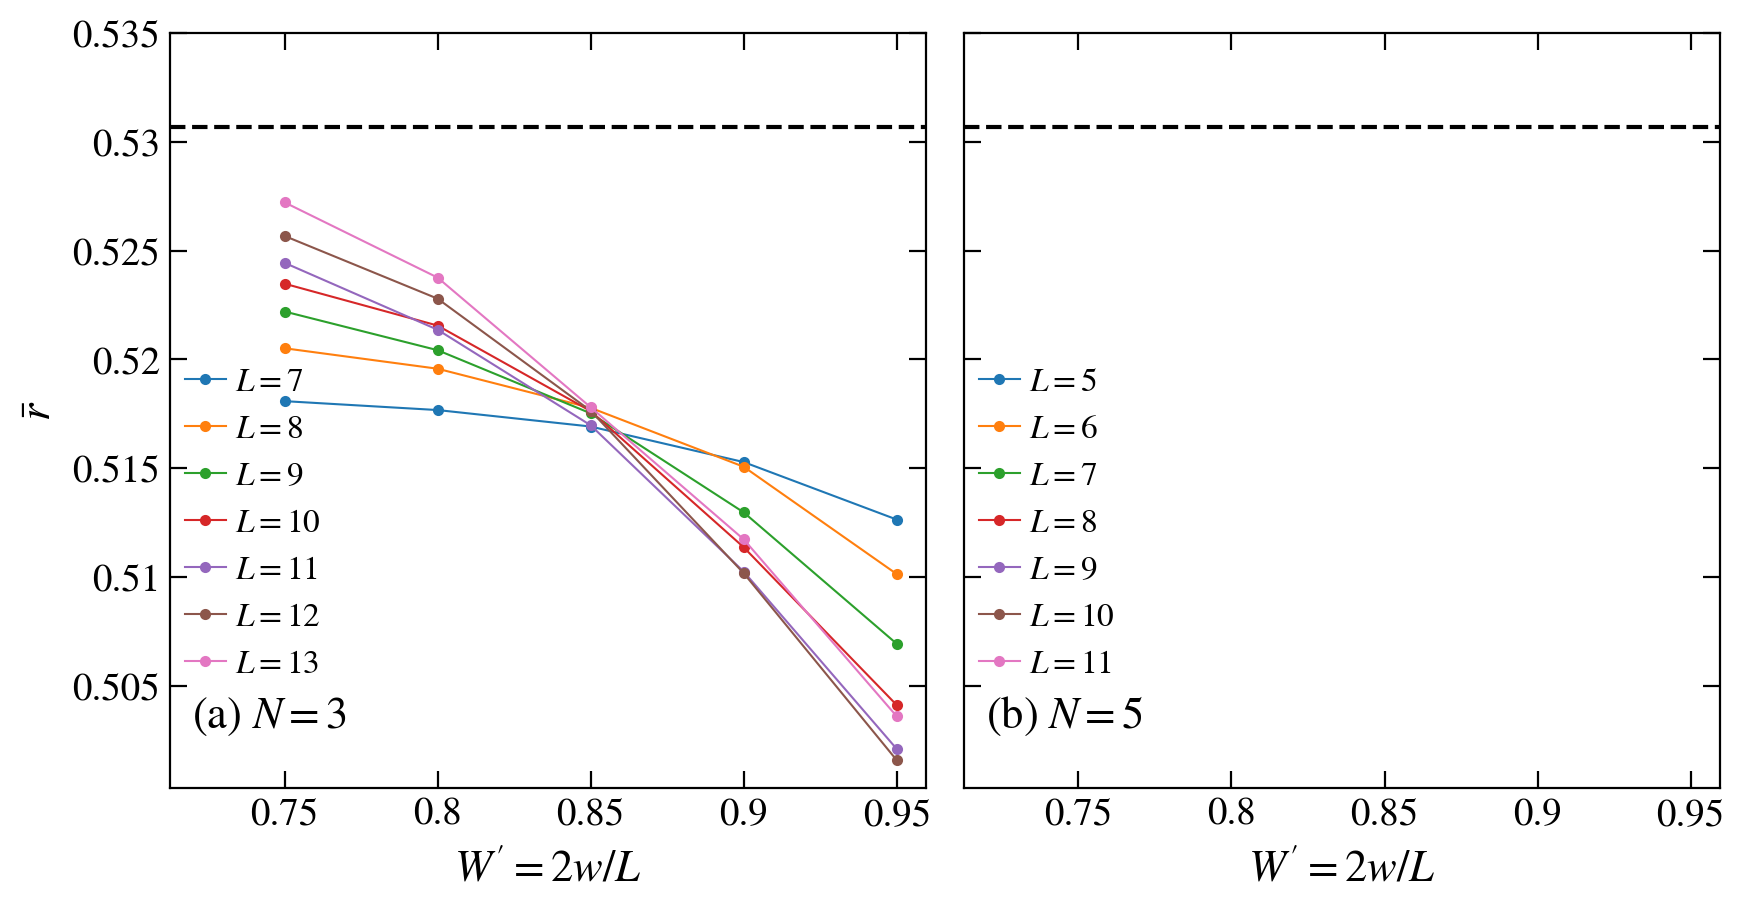

In [9]:
L_total=15
J=1.0
alfa=1.0
h=0.0
w=2.0
zeta=0.0
N=3
gamma=1.0
ini_ave=0
L = L_total - N

plot_gaps = 1

b = 1.5

w_vals = [10.0]
if config_disorder:
    w_vals = np.linspace(1.0, 4.9, 40)
    w_vals = np.round(10**w_vals, 5)
elif config_disorder:
    w_vals = np.linspace(0.5, 35.0, 70)
else:   
    w_vals = np.linspace(0.5, 20.0, 40)

w_vals = np.linspace(0.75, 0.95, 5)
print(w_vals)

sub_sizes = np.arange(0, L+1)
fig, axis = plt.subplots( nrows=1, ncols=2, figsize=(10,5), dpi = 200, sharey=True)

sizes = np.arange(10, 17, 1)

rescale = 0

nu = 500
frac = lambda dim: int(dim * nu) if nu <= 1.0 else nu

folder_base = f'./collected data_scaled disorder/'
folder = folder_base + base_dir[3:] + f"nu={nu}/"
os.makedirs(folder_base, exist_ok=True)
os.makedirs(folder, exist_ok=True)
    
xlab = r"$W'=2w/L$"    
ylab = r"$\bar{r}$"

for idx1, N in enumerate([3, 5]):
    
    disorder = []
    gaps = []
    for L_total in sizes:
        sub_sizes = np.arange(0, L_total+1)
        L = L_total - N
        LA = L_total // 2
        name_out = folder + f'_L={L},N={N},gamma={gamma},alfa={alfa}.hdf5'

        if exists(name_out):
            with h5py.File(name_out, "r") as file:
                w_vals       = np.array(file.get('scaled disorder'))
                gap_ratio    = np.array(file.get('gap_ratio'))
                entropy      = np.array(file.get('entropy'))
                entropy_site = np.array(file.get('single_site_entropy'))
        else:
            entropy         = np.zeros((sub_sizes.size, w_vals.size))
            entropy_site    = np.zeros((sub_sizes.size, w_vals.size))
            gap_ratio       = np.zeros((w_vals.size))
            realisations    = np.zeros((w_vals.size))
            for ii, w in enumerate(w_vals):
                name = base_dir + 'Entropy/Eigenstate/' + info(L=L, N=N, J=J, gamma=gamma, zeta=zeta, alfa=alfa, h=h, w=w, ext='.hdf5', scaled_disorder=scaled_disorder)
                if not exists(name): 
                    name = base_dir + 'Entropy/Eigenstate/' + info(L=L, N=N, J=J, gamma=gamma, zeta=zeta, alfa=alfa, h=h, w=w, ext='_beta.hdf5', scaled_disorder=scaled_disorder)
                #print(name)
                if exists(name):
                    with h5py.File(name, "r") as file:
                        energies = np.array(file.get('mean energies'))
                        ratio = np.array(file.get('gap ratio'))
                        realis = np.array(file.get('realisations'))[0]
                        realisations[ii] = realis
                        
                        dim = energies.size
                        num = frac(dim)
                        # print(dim, num)
                        E_av = np.mean(energies)
                        index_meanE = min(range(len(energies)), key=lambda i: abs(energies[i] - E_av))
                        
                        my_min = int(index_meanE - num / 2)
                        if my_min < 0: my_min = 0;  

                        my_max = int(index_meanE + num / 2)
                        if my_max >= dim: my_max = dim

                        try:
                            if num == 500:          gap_ratio[ii] = np.array(file.get('gap ratio 500'))
                            elif num == dim//2:     gap_ratio[ii] = np.array(file.get('gap ratio D/2'))
                            else:
                                # print("otherwise")
                                gap_ratio[ii] = np.mean(ratio[my_min : my_max]) if my_min > 0 and my_max < dim and num < dim else np.mean(ratio)
                            for LA in sub_sizes:
                                S = np.array(file.get('entropies'))[LA]
                                Ssite = np.array(file.get('single_site_entropy'))[LA]
                                entropy[LA][ii]         = np.mean(S[my_min : my_max]) if my_min > 0 and my_max < dim and num < dim else np.mean(S)
                                entropy_site[LA][ii]    = np.mean(Ssite[my_min : my_max]) if my_min > 0 and my_max < dim and num < dim else np.mean(Ssite)
                        except TypeError:
                            print(ratio)
                else:
                    print(name)

            if np.any(realisations):
                hf = h5py.File(name_out, 'w')
                hf.create_dataset('scaled disorder',        w_vals.shape,           data = w_vals)
                hf.create_dataset('gap_ratio',              gap_ratio.shape,        data = gap_ratio)
                hf.create_dataset('entropy',                entropy.shape,          data = entropy)
                hf.create_dataset('single_site_entropy',    entropy_site.shape,     data = entropy_site)
                hf.create_dataset('realisations',           realisations.shape,     data = realisations)
                hf.close()
        if rescale:
            if config_disorder:
                wx = w_vals / np.exp(L*np.log(2)) 
            else: 
                wx = 2 * w_vals / L**b
        else:
            wx = w_vals
        disorder.append(wx)
        gaps.append(gap_ratio)   
        
    # par, crit_pars, costfun, status = cost.get_crit_points(x=np.array(disorder), y=np.array(gaps), vals=sizes - N, crit_fun='free', scaling_ansatz='classic', seed=412438923)
    # print(crit_pars)
    
    # rescale_fun = cost.resc_functions_dict['classic']
    # critical_fun = cost.crit_functions_dict['free']
    # xlab = cost.scale_ansatz_label['classic']('W')

    for ii, L in enumerate(sizes - N):
        axis[idx1].plot(disorder[ii], gaps[ii], marker='o', markersize=3, lw=0.75, label=r"$L=%d$"%L)
        # axis[idx1].plot(rescale_fun(disorder[ii], sizes, ii, critical_fun, par, *crit_pars), gaps[ii], ls='--', marker='o', label=r"$L=%d$"%(L))

    axis[idx1].set_ylim(None,0.535)
    axis[idx1].set_xlim(0.95*min(np.array(disorder).flatten()), 1.01*max(np.array(disorder).flatten()))
    # axis[idx1].axhline(y=0.3863, ls='--', color='black')
    axis[idx1].axhline(y=0.5307, ls='--', color='black')


fig_help.set_plot_elements(axis[0], ylabel=ylab, xlabel=xlab, font_size=14, set_legend=False)
fig_help.set_legend(axis[0], loc = 'center left', fontsize=12, anchor=(-0.02, 0.35))
fig_help.set_plot_elements(axis[1], ylabel="", xlabel=xlab, font_size=14, set_legend=False)
fig_help.set_legend(axis[1], loc = 'center left', fontsize=12, anchor=(-0.02, 0.35))

if config_disorder:
    for ax in axis.flatten():
        ax.set_xscale('log')

for aa in [axis]:
    for ax in np.array(aa).flatten():
        ax.xaxis.set_minor_formatter(matplotlib.ticker.FuncFormatter(lambda x, pos: "%g"%x))
        ax.xaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, pos: "%g"%x))
        ax.yaxis.set_minor_formatter(matplotlib.ticker.FuncFormatter(lambda x, pos: "%g"%x))
        ax.yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, pos: "%g"%x))

axis[0].annotate(r"(a) $N=3$", fontsize=16, xy=(0.03, 0.08), xycoords='axes fraction')
axis[1].annotate(r"(b) $N=5$", fontsize=16, xy=(0.03, 0.08), xycoords='axes fraction')
# axis[0].set_title(r"$N=3, \gamma=%.1f$"%(gamma), fontsize=16)
# axis[1].set_title(r"$N=5, \gamma=%.1f$"%(gamma), fontsize=16)

fig.subplots_adjust(wspace = 0.05, hspace=0.2)

[0.75 0.8  0.85 0.9  0.95]
../results/Entropy/Evolution/_L=9,N=3,J=1,g=1,alfa=1,h=0,W'=0.7,ini_ave_jobid=0.hdf5
../results/Entropy/Evolution/_L=10,N=3,J=1,g=1,alfa=1,h=0,W'=0.7,ini_ave_jobid=0.hdf5


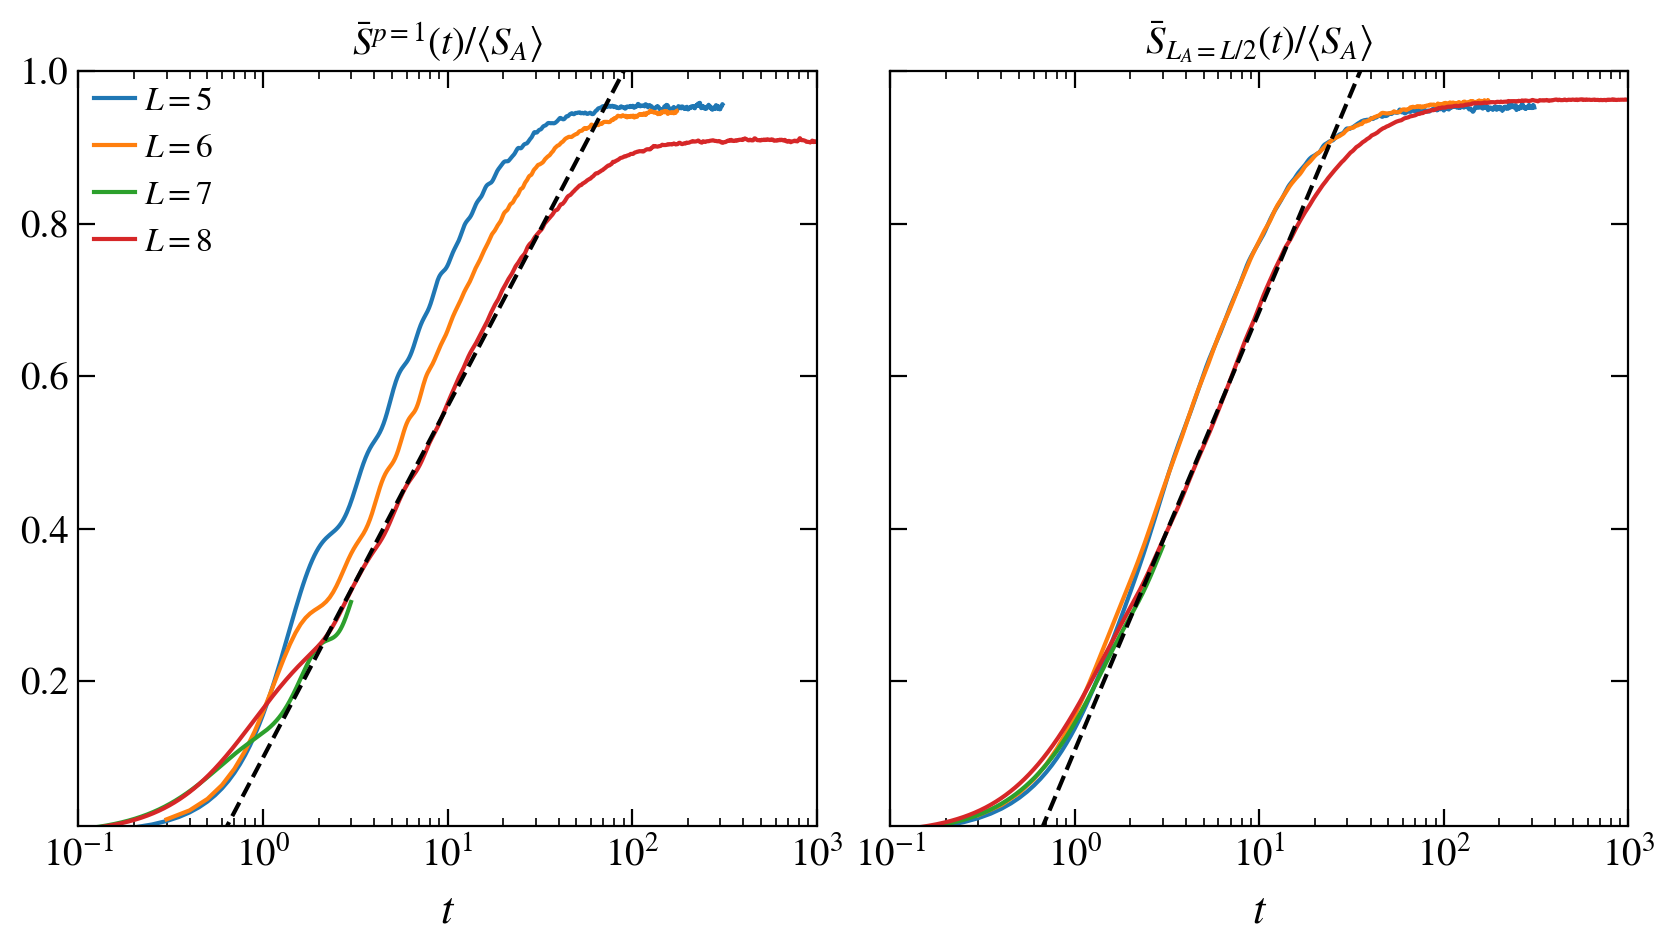

In [134]:
L_total=10
J=1.0
alfa=1.0
h=0.0

w=0.7
plot_derivative = 0
bucket = 5

zeta=0.0
N=3
gamma=1.0
ini_ave=0
L = L_total - N

w_vals = np.linspace(0.75, 0.95, 5)
print(w_vals)

sub_sizes = np.arange(0, L+1)
fig, axis = plt.subplots( nrows=1, ncols=2, figsize=(10,5), dpi = 200, sharey=True, sharex=True)

sizes = np.arange(8, 14, 1)

xlab = r"$t$"

for L_total in sizes:
    sub_sizes = np.arange(0, L_total+1)
    L = L_total - N
    LA = L_total // 2

    name = base_dir + 'Entropy/Evolution/' + info(L=L, N=N, J=J, gamma=gamma, zeta=zeta, alfa=alfa, h=h, w=w, ini_ave=1, ext='_jobid=0.hdf5', scaled_disorder=scaled_disorder)
    if exists(name):
        with h5py.File(name, "r") as file:
            times = np.array(file.get('times'))[0][bucket//2 : -bucket//2]
            
            S = tools.remove_fluctuations(np.array(file.get('single_site_entropy'))[-2], bucket)[bucket//2 : -bucket//2]
            if plot_derivative: 
                S = np.diff(S) / np.diff(times) * times[1:]
                axis[0].plot(times[1:], S, label=r"$L=%d$"%L)
            else:
                axis[0].plot(times, S  / page(1, L_total - 1), label=r"$L=%d$"%L)

            S = tools.remove_fluctuations(np.array(file.get('entropy'))[LA], bucket)[bucket//2 : -bucket//2]
            if plot_derivative: 
                S = np.diff(S) / np.diff(times) * times[1:]
                axis[1].plot(times[1:], S)
            else:
                axis[1].plot(times, S / page(LA, L_total - LA))
    else:
        print(name)


fig_help.set_plot_elements(axis[0], ylabel="", xlabel=xlab, font_size=14, set_legend=False, xscale='log', yscale='linear', ylim=(1e-2, None))
fig_help.set_plot_elements(axis[1], ylabel="", xlabel=xlab, font_size=14, set_legend=False, xscale='log', yscale='linear', ylim=(1e-2, None))
fig_help.set_legend(axis[0], loc = 'upper left', fontsize=12)

if not plot_derivative:
    axis[0].set_title(r"$\bar{S}^{p=1}(t)/\langle S_A\rangle$", fontsize=14)
    axis[1].set_title(r"$\bar{S}_{L_A=L/2}(t)/\langle S_A\rangle$", fontsize=14)
    axis[0].plot(times, 0.2*np.log(times) + 0.1, ls='--', c='k')
    axis[1].plot(times, 0.25*np.log(times) + 0.11, ls='--', c='k')
    axis[0].set_ylim(1e-2, 1)
    axis[0].set_xlim(1e-1, 1e3)
else:
    axis[0].set_title(r"$d\bar{S}^{p=1}(t)/d\ln{t}$", fontsize=14)
    axis[1].set_title(r"$d\bar{S}_{L_A=L/2}(t)/d\ln{t}$", fontsize=14)
    axis[0].set_xlim(1e-1, 1e3)
    axis[0].set_ylim(0, 1)
# for aa in [axis]:
#     for ax in np.array(aa).flatten():
#         ax.xaxis.set_minor_formatter(matplotlib.ticker.FuncFormatter(lambda x, pos: "%g"%x))
#         ax.xaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, pos: "%g"%x))
#         ax.yaxis.set_minor_formatter(matplotlib.ticker.FuncFormatter(lambda x, pos: "%g"%x))
#         ax.yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, pos: "%g"%x))


fig.subplots_adjust(wspace = 0.1, hspace=0.2)

[0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
../results/Entropy/Evolution/_L=8,N=3,J=1,g=1,alfa=1,h=0,W'=0.75,ini_ave_jobid=0.hdf5
../results/Entropy/Evolution/_L=8,N=3,J=1,g=1,alfa=1,h=0,W'=0.8,ini_ave_jobid=0.hdf5
../results/Entropy/Evolution/_L=8,N=3,J=1,g=1,alfa=1,h=0,W'=0.9,ini_ave_jobid=0.hdf5
../results/Entropy/Evolution/_L=8,N=3,J=1,g=1,alfa=1,h=0,W'=0.95,ini_ave_jobid=0.hdf5


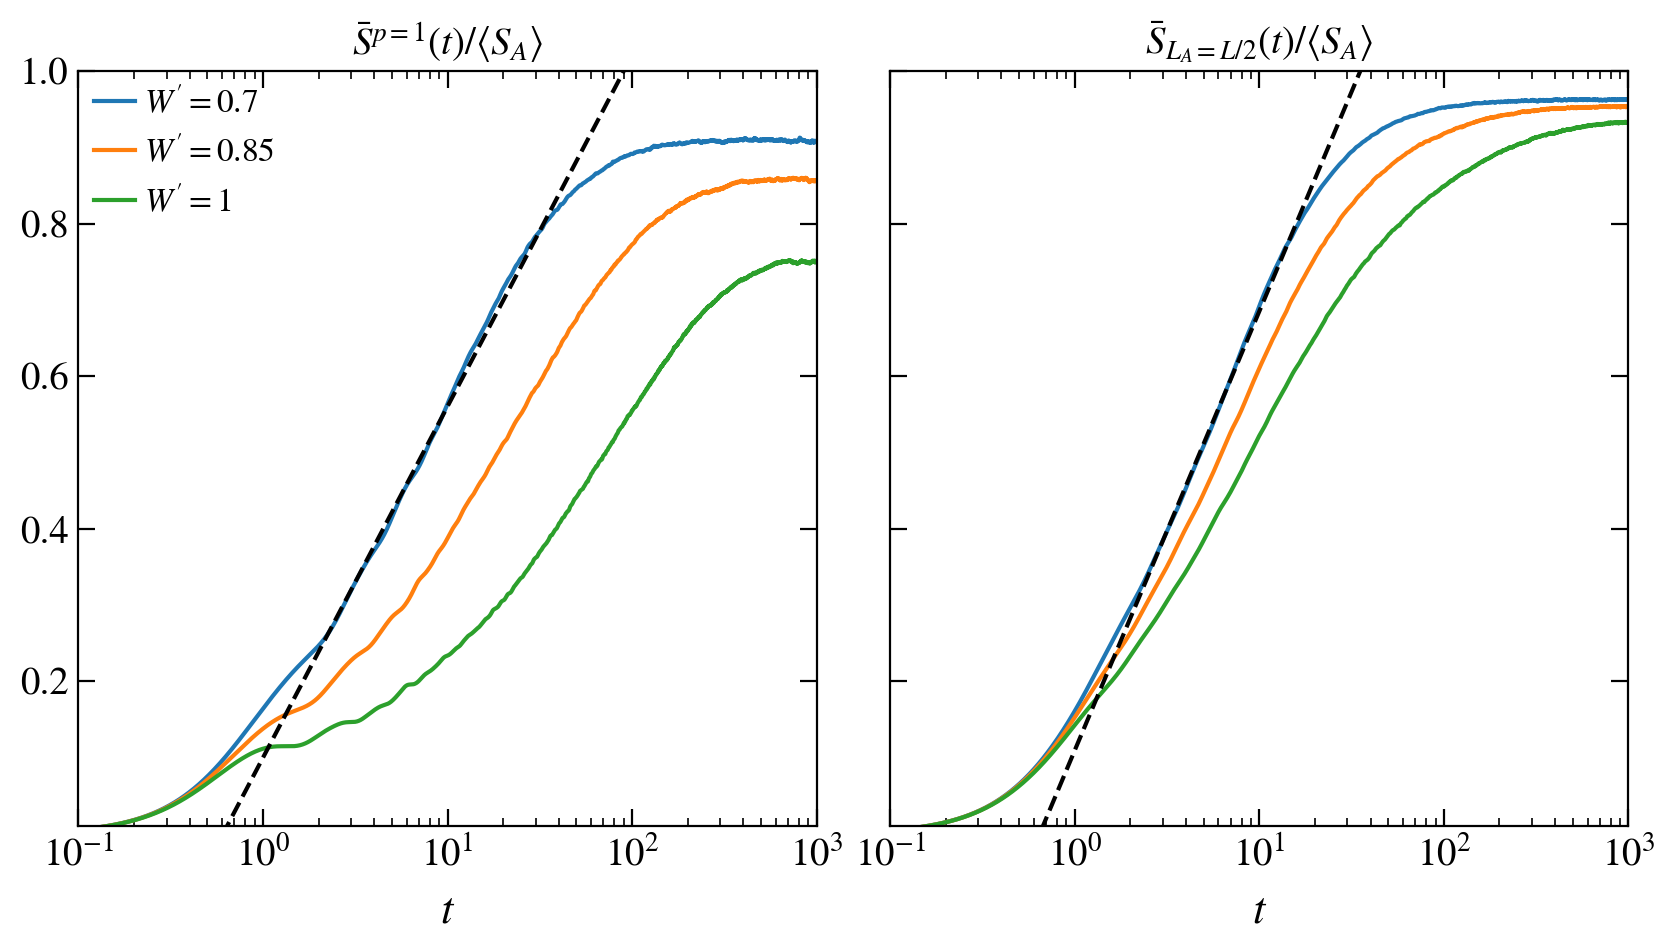

In [103]:
L_total=11
J=1.0
alfa=1.0
h=0.0

w=0.7

zeta=0.0
N=3
gamma=1.0
ini_ave=0
L = L_total - N

w_vals = np.linspace(0.7, 1.0, 7)
print(w_vals)

sub_sizes = np.arange(0, L+1)
fig, axis = plt.subplots( nrows=1, ncols=2, figsize=(10,5), dpi = 200, sharey=True, sharex=True)

sizes = np.arange(8, 17, 1)

xlab = r"$t$"

for w in w_vals:
    sub_sizes = np.arange(0, L_total+1)
    L = L_total - N
    LA = L_total // 2

    name = base_dir + 'Entropy/Evolution/' + info(L=L, N=N, J=J, gamma=gamma, zeta=zeta, alfa=alfa, h=h, w=w, ini_ave=1, ext='_jobid=0.hdf5', scaled_disorder=scaled_disorder)
    if exists(name):
        with h5py.File(name, "r") as file:
            times = np.array(file.get('times'))[0]
            
            S = np.array(file.get('single_site_entropy'))[-2] / page(1, L_total - 1)
            axis[0].plot(times, S, label=r"$W'=%g$"%w)

            S = np.array(file.get('entropy'))[LA] / page(LA, L_total - LA)
            axis[1].plot(times, S)
    else:
        print(name)

axis[0].plot(times, 0.2*np.log(times) + 0.1, ls='--', c='k')
axis[1].plot(times, 0.25*np.log(times) + 0.11, ls='--', c='k')

fig_help.set_plot_elements(axis[0], ylabel="", xlabel=xlab, font_size=14, set_legend=False, xscale='log', yscale='linear', ylim=(1e-2, None))
fig_help.set_plot_elements(axis[1], ylabel="", xlabel=xlab, font_size=14, set_legend=False, xscale='log', yscale='linear', ylim=(1e-2, None))
fig_help.set_legend(axis[0], loc = 'upper left', fontsize=12)

axis[0].set_title(r"$\bar{S}^{p=1}(t)/\langle S_A\rangle$", fontsize=14)
axis[1].set_title(r"$\bar{S}_{L_A=L/2}(t)/\langle S_A\rangle$", fontsize=14)
axis[0].set_xlim(1e-1, 1e3)
axis[0].set_ylim(1e-2, 1)

# for aa in [axis]:
#     for ax in np.array(aa).flatten():
#         ax.xaxis.set_minor_formatter(matplotlib.ticker.FuncFormatter(lambda x, pos: "%g"%x))
#         ax.xaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, pos: "%g"%x))
#         ax.yaxis.set_minor_formatter(matplotlib.ticker.FuncFormatter(lambda x, pos: "%g"%x))
#         ax.yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, pos: "%g"%x))


fig.subplots_adjust(wspace = 0.1, hspace=0.2)

[0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


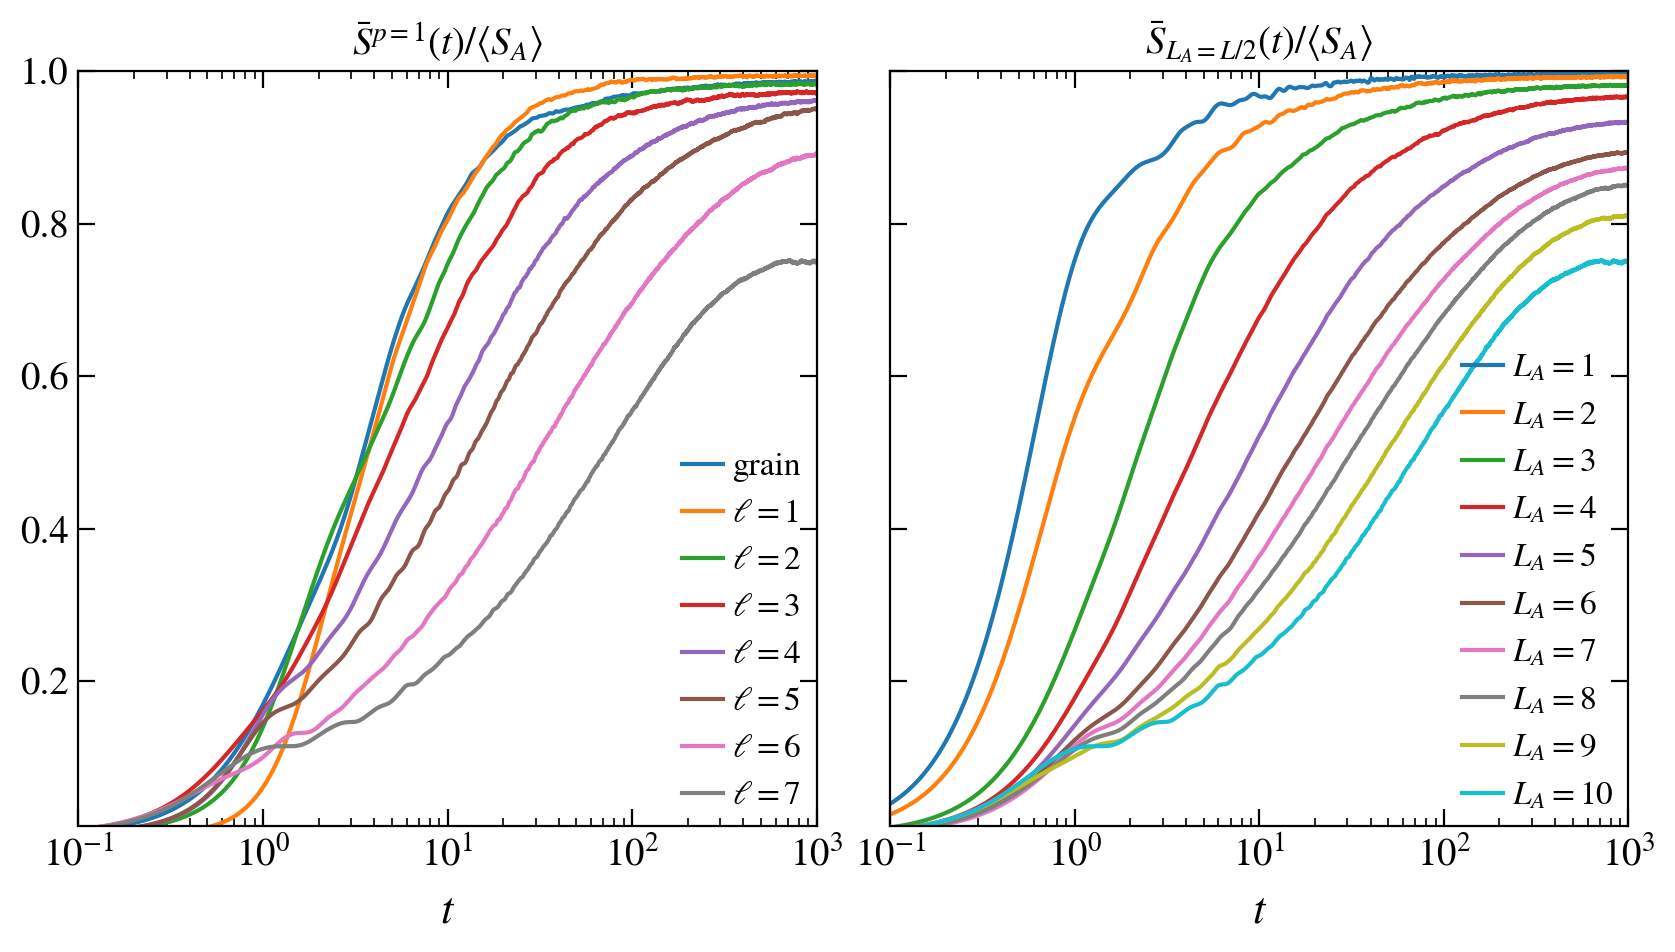

In [98]:
L_total=11
J=1.0
alfa=1.0
h=0.0

w=1.0

zeta=0.0
N=3
gamma=1.0
ini_ave=0
L = L_total - N

w_vals = np.linspace(0.7, 1.0, 7)
print(w_vals)

fig, axis = plt.subplots( nrows=1, ncols=2, figsize=(10,5), dpi = 200, sharey=True, sharex=True)

sizes = np.arange(8, 17, 1)

xlab = r"$t$"

sub_sizes = np.arange(1, L_total)
for LA in sub_sizes:

    name = base_dir + 'Entropy/Evolution/' + info(L=L, N=N, J=J, gamma=gamma, zeta=zeta, alfa=alfa, h=h, w=w, ini_ave=1, ext='_jobid=0.hdf5', scaled_disorder=scaled_disorder)
    if exists(name):
        with h5py.File(name, "r") as file:
            times = np.array(file.get('times'))[0]
            
            if LA >= N and LA < L_total:
                S = np.array(file.get('single_site_entropy'))[LA] / page(1, L_total - 1)
                axis[0].plot(times, S, label=r"$\ell=%d$"%(LA-N) if LA > N else "grain")

            S = np.array(file.get('entropy'))[LA] / page(LA, L_total - LA)
            axis[1].plot(times, S, label=r"$L_A=%d$"%LA)
    else:
        print(name)

fig_help.set_plot_elements(axis[0], ylabel="", xlabel=xlab, font_size=14, set_legend=False, xscale='log', yscale='linear', ylim=(1e-2, None))
fig_help.set_plot_elements(axis[1], ylabel="", xlabel=xlab, font_size=14, set_legend=False, xscale='log', yscale='linear', ylim=(1e-2, None))
fig_help.set_legend(axis[0], loc = 'lower right', fontsize=12)
fig_help.set_legend(axis[1], loc = 'lower right', fontsize=12)

axis[0].set_title(r"$\bar{S}^{p=1}(t)/\langle S_A\rangle$", fontsize=14)
axis[1].set_title(r"$\bar{S}_{L_A=L/2}(t)/\langle S_A\rangle$", fontsize=14)
axis[0].set_xlim(1e-1, 1e3)
axis[0].set_ylim(1e-2, 1)

# for aa in [axis]:
#     for ax in np.array(aa).flatten():
#         ax.xaxis.set_minor_formatter(matplotlib.ticker.FuncFormatter(lambda x, pos: "%g"%x))
#         ax.xaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, pos: "%g"%x))
#         ax.yaxis.set_minor_formatter(matplotlib.ticker.FuncFormatter(lambda x, pos: "%g"%x))
#         ax.yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, pos: "%g"%x))


fig.subplots_adjust(wspace = 0.1, hspace=0.2)